# IMPORT NECESSARY LIBRARY

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pl
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS

In [129]:
import re
import os
import datetime
from collections import Counter

# READ AND EXPLORE DATA

In [130]:
df=pd.read_csv('BeerDataScienceProject.csv',encoding="ISO-8859-1",
                         dtype={'CustomerID': str,'InvoiceID': str})

# OVERVIEW OF Dataset

In [131]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


# Exploratory Data Analysis (EDA)

#### A Detail to Look Data:-
###### 1.FEATURES
###### 2.Shape Of Data
###### 3.Statical and mathematical Data
###### 4.Type of Data
###### 5.Missing Data
###### 6.Dublicate Data
###### 7.unsuitable Data

###### 1.FEATURE

In [132]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time'],
      dtype='object')

##### 2.Shape of Data

In [133]:
df.shape

(528870, 13)

##### 3.Types of Data

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


##### OBSERVATIONS:-Out of 13 features, we have 4 features ['beer_name', 'beer_style','review_profileName','review_text'] which are categorical /text based features.The remaining 9 features ['beer_ABV', 'beer_beerId', 'beer_brewerId', 'review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_aroma', 'review_time'] are numeric type.

##### 4.Statical and Mathamatical Data

In [137]:
df.describe()

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


#### OBSERVATION:-
###### 1.The IQR(Inter Quartile Range) is 25% to 75% for the beer_ABV FEATURE it lies between 5.3 to 8.5 mean around 7 we observed outlier in beer_ABV Where max value 57.70 based on count it have also missing values
###### 2.beer_brewerId - although it is a numeric value but it signifies a specific value of corresponding to each brewery name.
###### 3.review_appearance, review_palette, review_taste, review_aroma and review_overall -They are key indicator related to each ascept to beer review the IQR lies between 3 to 4.5. all these value observed in range of 1 to 5 All values for these feature are fairly spread accros the mean value wich is centered to 3.8
###### 4.review_time is a numeric feaure which records the UNIX time when the review was given.


# 5.Missing Data

In [138]:
df.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [139]:
# Percent of data missing beer_ABV values
print("Percent of Null Values in beer_ABV column:", round(20280 / 528870 * 100, 2),"%")

Percent of Null Values in beer_ABV column: 3.83 %


In [140]:
# Percent of data missing in review_profileName values
print("Percent Null Values of review_profile column:", round(115 / 528870 * 100, 2),"%")

Percent Null Values of review_profile column: 0.02 %


In [141]:
# Percent of data missing in review_text values
print("Percent Null Values of review_time column:", round(119 / 528870 * 100, 2),"%")

Percent Null Values of review_time column: 0.02 %


#### Observation :
###### .Missing values are present for 3 features - beer_ABV, review_profileName, review_text..Around 3.8% of the values for the feature [beer_ABV] are missig, whereas the missing values for the [review_profileName, review_text] features are minuscule and only around 0.02 % of the total.Since missing data can reduce the statistical power and can produce biased estimates, leading to invalid conclusions, we will need to handle these missing values before building the mode

## 6.Dublicate Data

In [142]:
df.duplicated(keep=False).value_counts().mean()


528870.0

In [143]:
# Sort by user overall rating first
df = df.sort_values('review_overall', ascending=False)
df
# Keep the highest rating from each user and drop the rest 
df = df.drop_duplicates(subset= ['review_profileName','beer_name'], keep='first')
df
# Peep structure
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522928 entries, 338785 to 39601
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            502916 non-null  float64
 1   beer_beerId         522928 non-null  int64  
 2   beer_brewerId       522928 non-null  int64  
 3   beer_name           522928 non-null  object 
 4   beer_style          522928 non-null  object 
 5   review_appearance   522928 non-null  float64
 6   review_palette      522928 non-null  float64
 7   review_overall      522928 non-null  float64
 8   review_taste        522928 non-null  float64
 9   review_profileName  522818 non-null  object 
 10  review_aroma        522928 non-null  float64
 11  review_text         522811 non-null  object 
 12  review_time         522928 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 55.9+ MB


In [144]:
print("Percent of Duplicate Values:",round((528870 - 522928)/ 528870 * 100, 2),"%")

Percent of Duplicate Values: 1.12 %


# Univariate and Bivariate analysis of different features

<AxesSubplot:title={'center':'Most Poular Beers by Name'}>

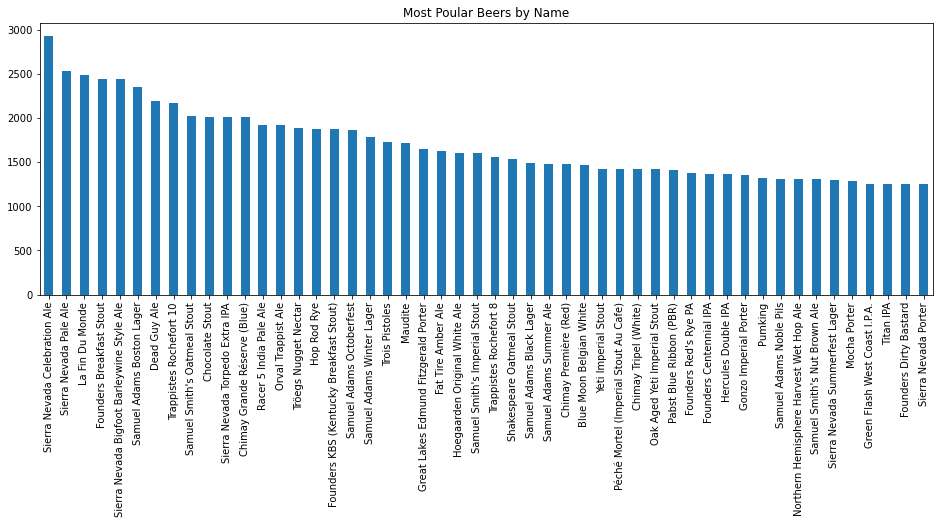

In [145]:
#Beer Name

df['beer_name'].value_counts().head(50).plot.bar(figsize=(16,5),title= 'Most Poular Beers by Name')

<AxesSubplot:title={'center':'Most Poular Beers by Style'}>

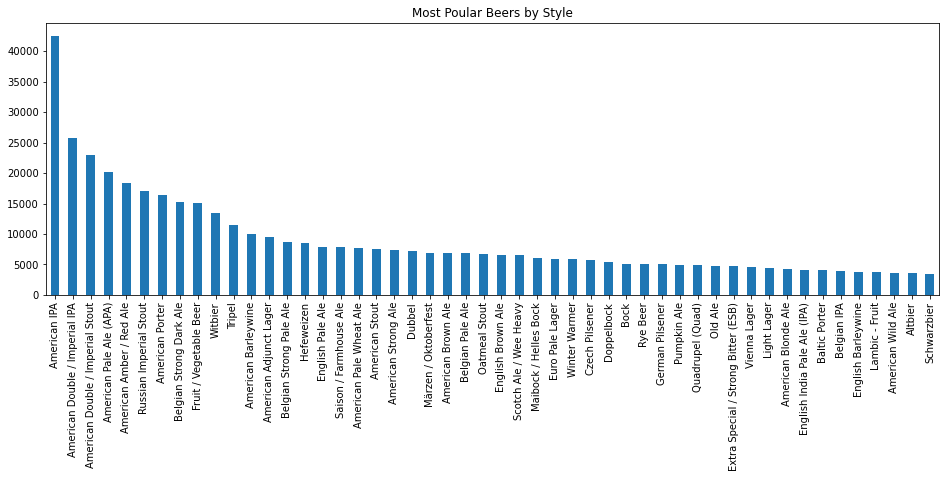

In [146]:
#Beer style

df['beer_style'].value_counts().head(50).plot.bar(figsize=(16,5),title= 'Most Poular Beers by Style')

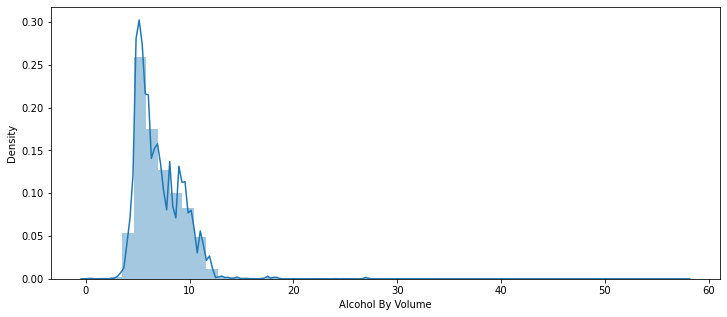

In [147]:
import warnings
warnings.filterwarnings(action = 'ignore')
#Beer ABV
plt.figure(figsize=(12,5))
sns.distplot(df['beer_ABV'],bins = 50)
##df['beer_ABV'].plot.density()  # this can be used alternatively but prefer sns.distplot
plt.xlabel("Alcohol By Volume")
plt.show()

## Observation :
##### .It can be infered that almost all of the majority data in the distribution of beer_ABV is between 5-10 with long tail towards right.
##### .Data is not perfectly normally distributed but good overall.

<AxesSubplot:>

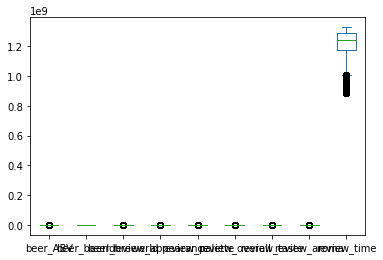

In [148]:
df.plot.box()

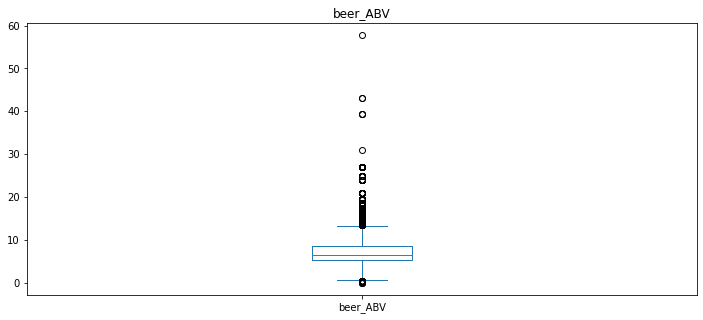

In [149]:
plt.figure(figsize=(12,5))
df['beer_ABV'].plot.box(title= 'beer_ABV') 
##df.boxplot(column='beer_ABV') # this can be used alternatively 
#plt.tight_layout()
plt.show()

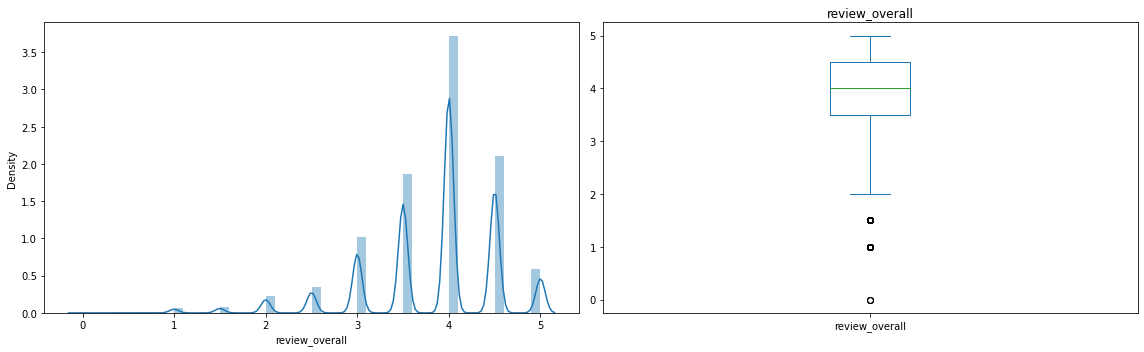

In [150]:
#Review Overall

plt.figure(figsize=(16,5))

plt.subplot(121) 
sns.distplot(df.review_overall,bins=50)

plt.subplot(122) 
df['review_overall'].plot.box(title= 'review_overall') 

plt.tight_layout()
plt.show()

Observation :
.It can be infered that the overall ratings are distributed in the range of 1 to 5 with most common rating is 4.
.Data is not normally distributed, left-skewness is observed in the data.
.Also the the IQR for the overall review feature is observed to be between 3.5-4.5

# Overview of Numeric Features

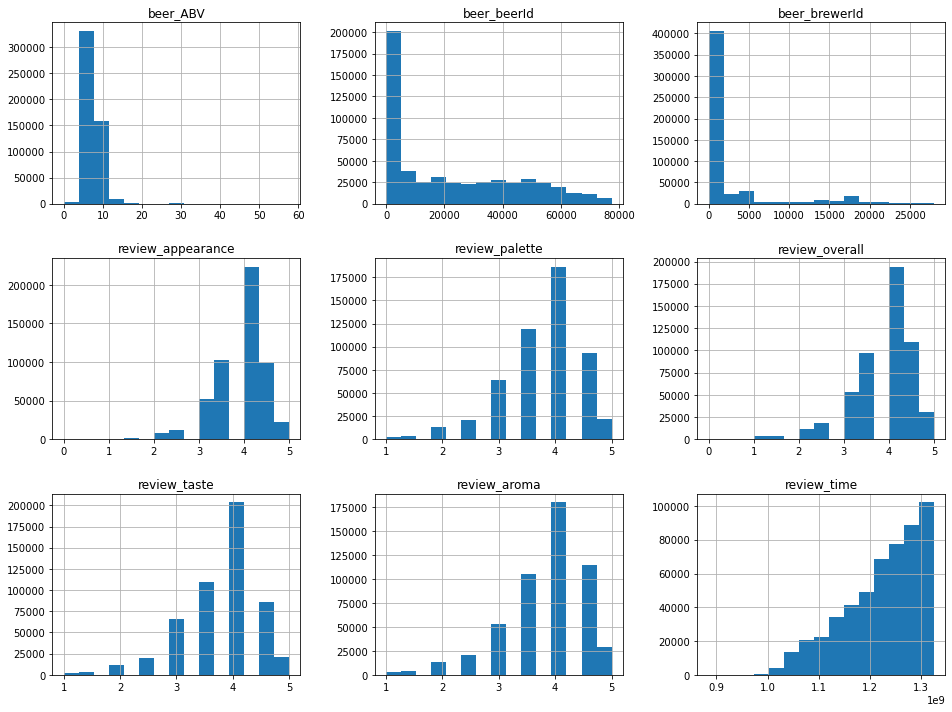

In [151]:
df.hist(bins = 15,figsize=(16,12))
plt.show()

1.beer_abv (Skewed right) Most beers are less than 20% ABV

2.beer_beerid (Skewed right) Lower IDs have more reviews than higher IDs

3.beer_brewery_id (Skewed right) Lower IDs have more reviews than higher IDs

4.review_appearance (Skewed left) Most beers rated 4 and higher

5.review_aroma (Normal) Most beers rated between 3 and 4

6.review_overall (Skewed left) Most beers rated 4 and higher

7.review_palate (Normal) Most beers rated between 3 and 4

8.review_taste Normal Most beers rated between 3.5 and 4.5

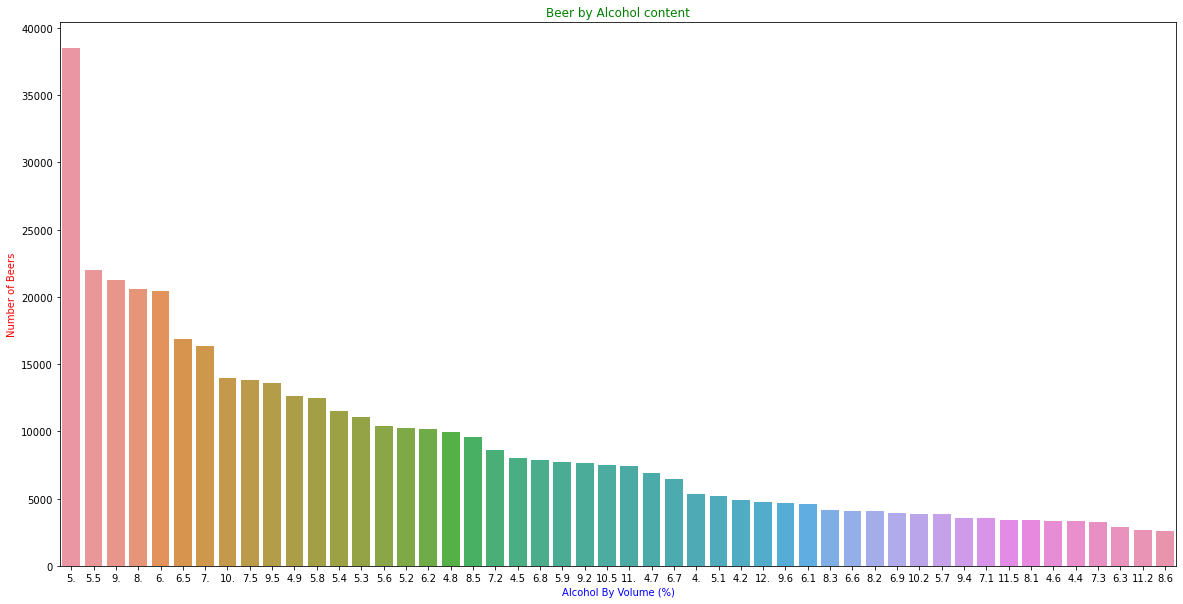

In [152]:
# Number of Beers By Alcohol content

d1 = df.groupby('beer_ABV')['beer_name'].count().sort_values(ascending=False).head(50)

x = list(d1.index.values)
for i in range(len(x)):
    x[i] = np.format_float_positional(np.float16(x[i]*1))

y = d1.values

plt.figure(figsize=(20,10))

sns.barplot(x,y)
plt.xlabel("Alcohol By Volume (%)",color='blue')
plt.ylabel("Number of Beers",color='red')
plt.title("Beer by Alcohol content", color='green')
plt.show()

In [153]:
d2 = df.groupby('beer_style')[['beer_ABV','review_overall','beer_name']].mean().sort_values('beer_style').reset_index()
d2

,beer_style,beer_ABV,review_overall
0,Altbier,5.950339,3.876498
1,American Adjunct Lager,4.846168,3.116086
2,American Amber / Red Ale,6.244348,3.857387
3,American Amber / Red Lager,4.897895,3.388774
4,American Barleywine,10.306160,3.921803
...,...,...,...
99,Vienna Lager,5.143028,3.921788
100,Weizenbock,8.007583,3.951099
101,Wheatwine,11.550341,3.818335
102,Winter Warmer,6.715328,3.714887


In [154]:
#Beer style vs Beer ABV
fig = pl.scatter(d2,x="beer_style",y="beer_ABV")
fig.show()

In [ ]:
Observatin:
.Almost all the Beer Styles have an average alcohol volume, ABV > 4%.

# FEATURE ENG AND CONSTRUCTION

#### Handling the missing values for 'review_profileName' feature

In [ ]:
#since profile name (categorical feature) is merely a name of the person givng the review comments, 
#we will repace the missing values with the mode of the feature i.e. northyorksammy


In [155]:
df.loc[df['review_profileName'].isna(),'review_profileName'] = df['review_profileName'].fillna(df['review_profileName'].mode()[0])

In [156]:
df['review_profileName'].mode()[0]

'northyorksammy'

In [157]:
df.review_profileName.isna().sum()

0

#### Handling the missing values for 'review_text' feature

In [ ]:
#since review text is the description of the user's specific comments about a particular beer, 
#we will repace the missing values for the reviw text with the most common review text i.e. '#NAME?'. 


In [158]:
df.loc[df['review_text'].isna(),'review_text'] = df['review_text'].fillna(df['review_text'].mode()[0])

In [159]:
df.review_text.isna().sum()

0

##### Handling the missing values for 'beer_ABV' feature

In [160]:
df.loc[:,['beer_name','beer_ABV']]

,beer_name,beer_ABV
338785,Trappistes Rochefort 8,9.2
123522,Sweetwater Happy Ending Imperial Stout,9.0
411322,Tröegs Nugget Nectar,7.5
247862,Chimay Grande Réserve (Blue),9.0
180183,AleSmith Speedway Stout,12.0
...,...,...
397698,Moosehead Lager,5.0
362527,Molson M,4.9
39638,Utah Pale Ale,4.0
39617,Latter Days Stout,4.0


In [161]:
print('No. of unique values of beer names in the given data :',df.beer_name.nunique(dropna=False))

print('No. of unique values of beer abv in the given data :',df.beer_ABV.nunique(dropna=False))

No. of unique values of beer names in the given data : 18339
No. of unique values of beer abv in the given data : 284


In [162]:
#create a dataframe for beer_ABV not null data

df_NNA = df.loc[df.beer_ABV.notna(),['beer_name','beer_ABV']].sort_values(by = 'beer_name', axis=0, ascending=True, 
                                                         inplace=False, kind='quicksort', na_position='last')
df_NNA

,beer_name,beer_ABV
432191,"""100"" Pale Ale",6.6
327823,"""33"" Export",4.8
327825,"""33"" Export",4.8
327824,"""33"" Export",4.8
322078,"""76"" Anniversary Ale",7.6
...,...,...
178251,überPils,7.6
178252,überPils,7.6
178247,überPils,7.6
178246,überPils,7.6


In [163]:
print('No. of unique values of beer names in the not_null data :',df_NNA.beer_name.nunique(dropna=False))

print('No. of unique values of beer abv in the not_null data :',df_NNA.beer_ABV.nunique(dropna=False))

No. of unique values of beer names in the not_null data : 14027
No. of unique values of beer abv in the not_null data : 283


In [164]:
#get the mode of the 'beer_ABV' feature corresponding to the 'beer_name' feature


In [165]:
get_items = lambda vals : max(Counter(vals).items(), key = lambda x : x[1])[0] 
beer_name_abv1 = df_NNA.groupby('beer_name')['beer_ABV'].agg(get_items).to_dict()
beer_name_abv1

{'"100" Pale Ale': 6.6,
 '"33" Export': 4.8,
 '"76" Anniversary Ale': 7.6,
 '"76" Anniversary Ale With English Hops': 7.6,
 '"Fade To Black" Porter': 5.6,
 '"Great Satchmo" Stout': 4.5,
 '"Jessica & Brendan\'s" Bridal Ale': 5.0,
 '"Just One More" Scotch Ale': 10.5,
 '"Nein Toll Bier" German Alt': 5.4,
 '"O Smokey Night"': 7.2,
 '"Old Yeltsin" Imperial Stout': 9.0,
 '"Requisite" Imperialistic Stout': 9.0,
 '"Stout Stoat" Stout': 4.5,
 '"The Buk" Pale Ale': 5.5,
 '"The Wind Cried Mari..." Scottish Heather Ale': 4.4,
 '"Woosta" Weizenbock': 8.2,
 '&#268;erné Zámecké': 4.2,
 '&#960;&#964;&#953;&#963;&#940;&#957;&#951; (tisane)': 2.0,
 "'Pooya Porter": 5.5,
 "'Vagabond Blonde' Blonde Ale": 5.5,
 "'t Gaverhopke / Tired Hands Bitter Sweet Symphony": 7.8,
 "'t Gaverhopke De Kriek (Red Cap)": 7.0,
 "'t Gaverhopke Den Blond 8° (White Cap)": 8.0,
 "'t Gaverhopke Den Bruin 8° (Blue Cap)": 8.0,
 "'t Gaverhopke Extra": 12.0,
 "'t Gaverhopke Zingende Blondine": 9.8,
 "'t Goeye Goet Dubbel": 7.0,
 "'t

In [166]:
#replace the beer_ABV feture with the mode of the 'beer_ABV' feature corresponding to the beer_name

df.beer_ABV = df.beer_name.map(beer_name_abv1)

In [167]:
#we can observe that around (20280-17920=)2360 the missing values in the beer_ABV feature got replaced by mode.

df.loc[df.beer_ABV.isna()].shape[0]

17828

In [168]:
df.loc[df.beer_ABV.notna(),['beer_name','beer_ABV']]

,beer_name,beer_ABV
338785,Trappistes Rochefort 8,9.2
123522,Sweetwater Happy Ending Imperial Stout,9.0
411322,Tröegs Nugget Nectar,7.5
247862,Chimay Grande Réserve (Blue),9.0
180183,AleSmith Speedway Stout,12.0
...,...,...
397698,Moosehead Lager,5.0
362527,Molson M,4.9
39638,Utah Pale Ale,4.0
39617,Latter Days Stout,4.0


In [169]:
#now get the mode of the 'beer_ABV' feature corresponding to the 'beer_name' feature for the entire data

get_items1 = lambda vals : max(Counter(vals).items(), key = lambda x :(x[0] != np.NaN) & x[1])[0] 
beer_name_abv2 = df.groupby('beer_name')['beer_ABV'].agg(get_items1).to_dict()
beer_name_abv2

{'"100" Pale Ale': 6.6,
 '"33" Export': 4.8,
 '"76" Anniversary Ale': 7.6,
 '"76" Anniversary Ale With English Hops': 7.6,
 '"Fade To Black" Porter': 5.6,
 '"Great Satchmo" Stout': 4.5,
 '"Jessica & Brendan\'s" Bridal Ale': 5.0,
 '"Just One More" Scotch Ale': 10.5,
 '"Nein Toll Bier" German Alt': 5.4,
 '"O Smokey Night"': 7.2,
 '"Old Yeltsin" Imperial Stout': 9.0,
 '"Requisite" Imperialistic Stout': 9.0,
 '"Stout Stoat" Stout': 4.5,
 '"Talk To Me" IPA': nan,
 '"The Bridge" Nut-Brown Ale': nan,
 '"The Buk" Pale Ale': 5.5,
 '"The Mountain" Ale': nan,
 '"The Wind Cried Mari..." Scottish Heather Ale': 4.4,
 '"Woosta" Weizenbock': 8.2,
 '&#268;erné Zámecké': 4.2,
 '&#960;&#964;&#953;&#963;&#940;&#957;&#951; (tisane)': 2.0,
 "'99 Wee Heavy Scotch Ale": nan,
 "'Bout Time Barley Wine": nan,
 "'Pooya Porter": 5.5,
 "'Sconnie Pale Ale": nan,
 "'Sconnie Rustic Trail Amber": nan,
 "'Sconnie Tall Blonde Ale": nan,
 "'Tis The Seasonator": nan,
 "'Vagabond Blonde' Blonde Ale": 5.5,
 "'Zula Stout": na

##### .Since the beer_ABV values are not present at all for these 17828 records, we will drop these datapoints from our dataset for further analysis.

In [170]:
df.dropna(inplace=True)
df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
338785,9.2,1696,207,Trappistes Rochefort 8,Dubbel,4.0,4.5,5.0,4.0,zeff80,4.5,A - Pours out a reddish/brown color with a thr...,1166570949
123522,9.0,19488,273,Sweetwater Happy Ending Imperial Stout,American Double / Imperial Stout,4.0,4.5,5.0,4.0,kimcgolf,3.5,"This was a really good beer, but not a really ...",1173614122
411322,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.5,4.5,5.0,5.0,Chico1985,5.0,"Bomber poured into a pint glass, bottle date i...",1263618175
247862,9.0,2512,215,Chimay Grande Réserve (Blue),Belgian Strong Dark Ale,4.0,4.5,5.0,4.5,gford217,4.5,330mL bottle. Pours deep mahogany that shows f...,1282362360
180183,12.0,3833,396,AleSmith Speedway Stout,American Double / Imperial Stout,4.5,4.5,5.0,4.0,RonfromJersey,4.5,"Black, or the darkest possible brown, body, na...",1264310693
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397698,5.0,1053,379,Moosehead Lager,American Pale Lager,2.5,1.0,1.0,2.0,ski271,1.0,"Holy skunk, Batman! Usually the first thing I ...",1111954947
362527,4.9,54274,433,Molson M,American Adjunct Lager,2.5,2.0,1.0,2.0,kjyost,1.0,"Bought for me, I chose it as it was new to me ...",1309056610
39638,4.0,3810,1413,Utah Pale Ale,American Pale Ale (APA),0.0,3.0,0.0,2.0,beernut7,2.0,This American pale ale has a spicy grassy hop ...,1030266889
39617,4.0,3804,1413,Latter Days Stout,Irish Dry Stout,0.0,4.0,0.0,2.0,beernut7,2.0,This beer presents with a heavy smoky roast ar...,1030267158


In [171]:
df.isna().sum()


beer_ABV              0
beer_beerId           0
beer_brewerId         0
beer_name             0
beer_style            0
review_appearance     0
review_palette        0
review_overall        0
review_taste          0
review_profileName    0
review_aroma          0
review_text           0
review_time           0
dtype: int64

# Featurization - Adding new Feature for simplifying analysis

In [172]:
df['review_time'] =pd.to_datetime(df['review_time'],unit='s')

#printing out the new and updated data types and the column head
print(df.dtypes)
print(df['review_time'].head())

beer_ABV                     float64
beer_beerId                    int64
beer_brewerId                  int64
beer_name                     object
beer_style                    object
review_appearance            float64
review_palette               float64
review_overall               float64
review_taste                 float64
review_profileName            object
review_aroma                 float64
review_text                   object
review_time           datetime64[ns]
dtype: object
338785   2006-12-19 23:29:09
123522   2007-03-11 11:55:22
411322   2010-01-16 05:02:55
247862   2010-08-21 03:46:00
180183   2010-01-24 05:24:53
Name: review_time, dtype: datetime64[ns]


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505100 entries, 338785 to 39601
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   beer_ABV            505100 non-null  float64       
 1   beer_beerId         505100 non-null  int64         
 2   beer_brewerId       505100 non-null  int64         
 3   beer_name           505100 non-null  object        
 4   beer_style          505100 non-null  object        
 5   review_appearance   505100 non-null  float64       
 6   review_palette      505100 non-null  float64       
 7   review_overall      505100 non-null  float64       
 8   review_taste        505100 non-null  float64       
 9   review_profileName  505100 non-null  object        
 10  review_aroma        505100 non-null  float64       
 11  review_text         505100 non-null  object        
 12  review_time         505100 non-null  datetime64[ns]
dtypes: datetime64[ns](1), flo

# QUESTION AND ANSWERS


# 1.Rank top 3 Breweriesnwich produce the strongest beers?

.Based on the alcohol volume of a beer (i.e. 'beer_ABV'), we can determine how strong it is.
.In this dataset, we are given only 'beer_brewerId' and not the corresponding 'brewer_names', so we will use the 'beer_brewerId' for finding the breweries which produce the strongest beer.¶

In [184]:
import plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [182]:
df_abv = df.groupby(['beer_brewerId','beer_name'])['beer_ABV','beer_name'].mean()
df_abv = pd.DataFrame(data=df_abv).sort_values(by=['beer_ABV'],ascending=False).reset_index()
df_abv.head(3)

,beer_brewerId,beer_name,beer_ABV
0,6513,Schorschbräu Schorschbock 57%,57.70
1,6513,Schorschbräu Schorschbock 43%,43.00
2,6513,Schorschbräu Schorschbock 40%,39.44


In [187]:
# Top 10 Beers by ABV
top_10_abv = df[['beer_name','beer_ABV']].sort_values('beer_ABV', ascending=False).drop_duplicates('beer_name').\
    head(3).\
    sort_values('beer_ABV', ascending=True)

# Combine brewery and beer name for readability
#top_10_abv['combined_name'] = top_10_abv['brewery_name'].str.\
  #cat(top_10_abv['beer_name'], sep=' : ')

# Plot it
p = [go.Bar(x = top_10_abv['beer_ABV'] / 100,
            y = top_10_abv['beer_name'],
            hoverinfo = 'x',
            
            textposition = 'inside',
            orientation = 'h',
            opacity=0.7, 
            marker=dict(
                color='rgb(1, 87, 155)'))]

In [188]:
# Pieces of Flair
layout = go.Layout(title='Top 10 Strongest Beers by ABV',
                   xaxis=dict(title="ABV",
                              tickformat = "%",
                              hoverformat = '.2%'),
                   margin = dict(l = 220),
                   font=dict(family='Courier New, monospace',
                            color='dark gray'))

fig = go.Figure(data=p, layout=layout)

# Plot it
py.offline.iplot(fig)

# so top 3 Breweriesnwich produce the strongest beers
## 1.Schorschbräu Schorschbock -- 57%
## 2.Schorschbräu Schorschbock -- 43%
## 3.Schorschbräu Schorschbock -- 40%

# 2) Which year did beers enjoy the highest ratings?

In [192]:
df['year'] = df['review_time'].dt.year

In [193]:
df_dt = df.loc[:,['year','review_overall']]

In [194]:
df_dt = df_dt.groupby('year')[['review_overall']].mean().sort_values('review_overall',ascending = False).reset_index()
df_dt

,year,review_overall
0,2000,4.258621
1,1998,4.041667
2,1999,4.026316
3,2001,3.976937
4,2010,3.869787
5,2009,3.868612
6,2005,3.844668
7,2008,3.840441
8,2012,3.838005
9,2011,3.833347


In [196]:
Yearly_Avg_Rating=df.groupby(['year'])['review_overall'].mean().reset_index()

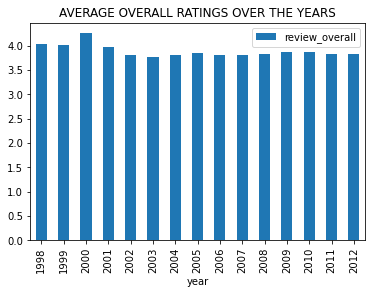

In [197]:
Yearly_Avg_Rating.plot(x="year",y=["review_overall"],kind="bar",title="AVERAGE OVERALL RATINGS OVER THE YEARS")
plt.show()

# Year 2000 got the highest overall rating of 4.24 followed by year 1998 and 1999 with overall rating of 4.045 and 4.000 respectively.



# 3)Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

###### For determining the important factors, we need to find the correlation amongst different factors. Compare the different factors with the overall review and thus find the important factor.

In [198]:
df_imp_fact = df.loc[:,['review_taste','review_aroma','review_appearance', 'review_palette', 'review_overall']]
df_imp_fact

,review_taste,review_aroma,review_appearance,review_palette,review_overall
338785,4.0,4.5,4.0,4.5,5.0
123522,4.0,3.5,4.0,4.5,5.0
411322,5.0,5.0,4.5,4.5,5.0
247862,4.5,4.5,4.0,4.5,5.0
180183,4.0,4.5,4.5,4.5,5.0
...,...,...,...,...,...
397698,2.0,1.0,2.5,1.0,1.0
362527,2.0,1.0,2.5,2.0,1.0
39638,2.0,2.0,0.0,3.0,0.0
39617,2.0,2.0,0.0,4.0,0.0


In [199]:
corr_mat = df_imp_fact.corr()


,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.000000,0.722608,0.551509,0.600590,0.689186
review_aroma,0.722608,1.000000,0.530843,0.703117,0.780482
review_appearance,0.551509,0.530843,1.000000,0.544415,0.482925
review_palette,0.600590,0.703117,0.544415,1.000000,0.598058
review_overall,0.689186,0.780482,0.482925,0.598058,1.000000


In [207]:
# Method 1 - Heatmap: Pandas
# List of numeric factors to include
factors = ["review_appearance","review_aroma","review_palette","review_taste", "review_overall"]

# Create a correlation matrix 
corr_metrics = df[factors].corr()
corr_metrics.style.background_gradient(cmap='Blues')

,review_appearance,review_aroma,review_palette,review_taste,review_overall
review_appearance,1.000000,0.530843,0.544415,0.551509,0.482925
review_aroma,0.530843,1.000000,0.703117,0.722608,0.780482
review_palette,0.544415,0.703117,1.000000,0.600590,0.598058
review_taste,0.551509,0.722608,0.600590,1.000000,0.689186
review_overall,0.482925,0.780482,0.598058,0.689186,1.000000


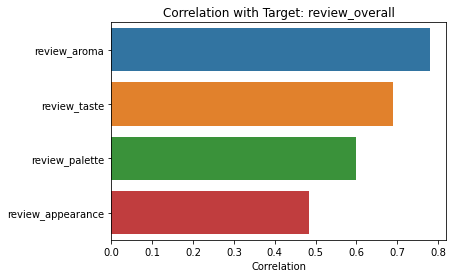

<Figure size 864x576 with 0 Axes>

In [209]:
# Correlation with target review_overall
factor_corr = corr_metrics[['review_overall']].drop(['review_overall']).reset_index().sort_values('review_overall', ascending=True)

# Plot it with Seaborn just for fun
sns.barplot(data=factor_corr.sort_values('review_overall', ascending=False), y="index",x="review_overall")
plt.ylabel(""); plt.xlabel("Correlation")
plt.title("Correlation with Target: review_overall")
plt.figure(figsize=(12,8))
plt.show()

# It can be observed that the 'review_aroma' feature is most correlated with the 'review_overall' feature and thus we can conclude it to be an important feature based on user's review and different ratings.

# 4) If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

###### For determining whether a beer is overall good or not, we will consider 2 factors here - 'review_overall' and 'beer_ABV'.                                                                                                                                                                Those beers witht the best overall values considering both the overall ratings and alcohol volume will be considered for recommendation.

In [210]:
df_best = df.loc[:,['beer_name','review_overall','beer_ABV']]
df_best

,beer_name,review_overall,beer_ABV
338785,Trappistes Rochefort 8,5.0,9.2
123522,Sweetwater Happy Ending Imperial Stout,5.0,9.0
411322,Tröegs Nugget Nectar,5.0,7.5
247862,Chimay Grande Réserve (Blue),5.0,9.0
180183,AleSmith Speedway Stout,5.0,12.0
...,...,...,...
397698,Moosehead Lager,1.0,5.0
362527,Molson M,1.0,4.9
39638,Utah Pale Ale,0.0,4.0
39617,Latter Days Stout,0.0,4.0


In [216]:
df_best = df_best.groupby('beer_name')['review_overall','beer_ABV'].mean().reset_index().sort_values(by = ['review_overall','beer_ABV'],ascending = False).head(10)
df_best[:3]

,beer_name,review_overall,beer_ABV
0,AleSmith Speedway Stout - Oak Aged,5.0,12.0
8,Pilot Series Imperial Sweet Stout - Palm Ridge...,5.0,12.0
2,Bees Knees Barleywine,5.0,11.2


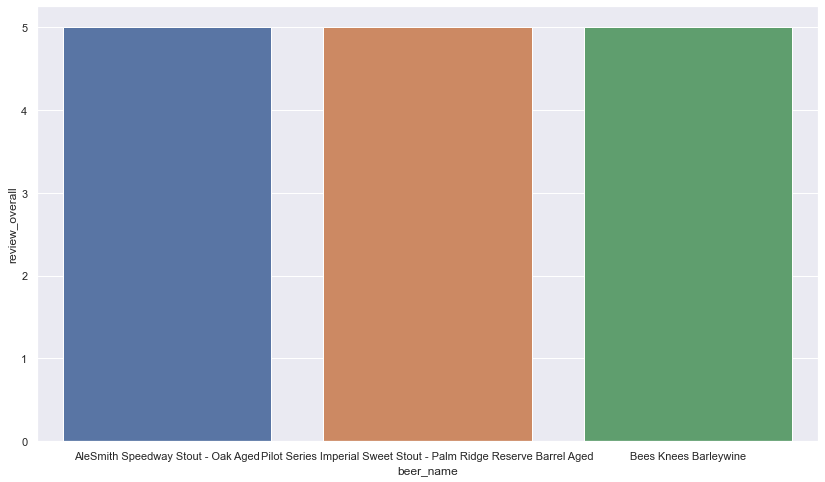

In [229]:
sns.set(rc ={'figure.figsize':(14,8)})
sns.barplot(x='beer_name',y='review_overall',data=df_best[:3])
plt.show()

# Q5:Which Beer style seems to be the favorite based on reviews written by users?

Text(0.5, 1.0, 'Most Favorite Beer Styles by Count of written reviews')

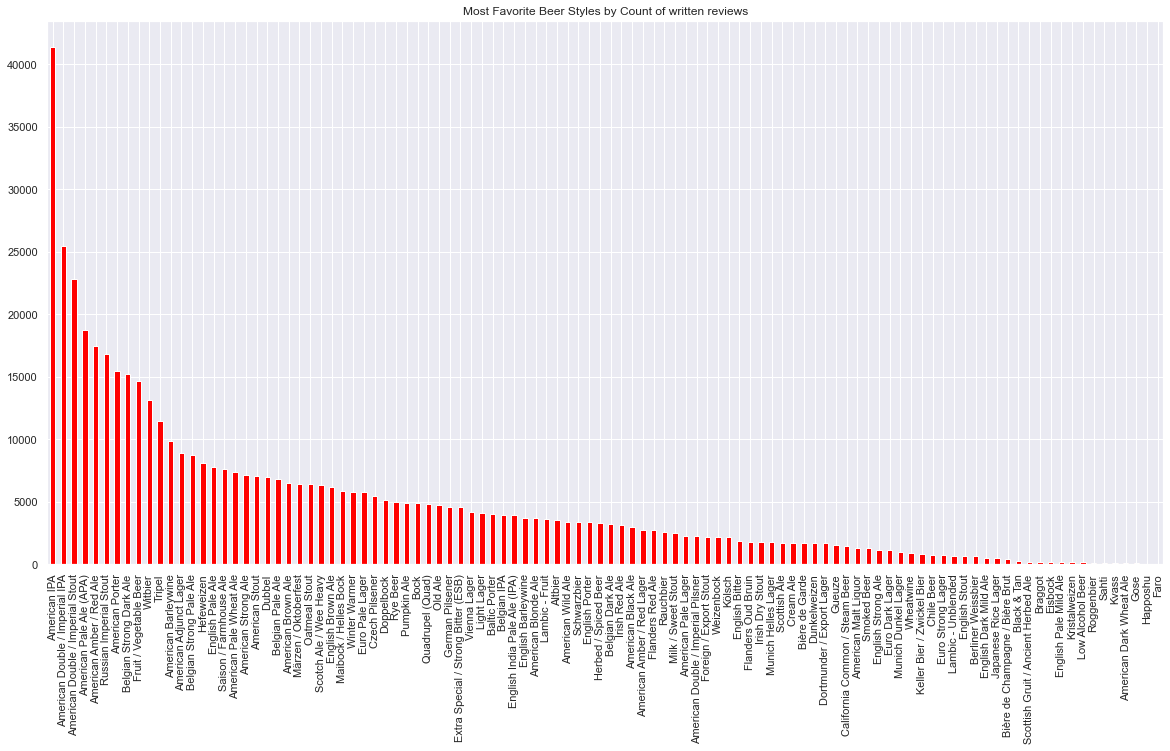

In [259]:
plt.figure(figsize=(20,10))

df['beer_style'].value_counts().plot(kind = "bar", color = "red")

plt.title("Most Favorite Beer Styles by Count of written reviews")

In [232]:
df_bsrt = df.loc[:,['beer_style','review_text']].sort_values(by='beer_style')
df_bsrt = df_bsrt.iloc[0:100000,:]

In [233]:
df_tmp = df_bsrt.groupby('beer_style')['review_text'].count().nlargest(10)
df_tmp

beer_style
American Double / Imperial IPA      25470
American Amber / Red Ale            17466
American Double / Imperial Stout    16510
American Barleywine                  9881
American Adjunct Lager               8906
American Brown Ale                   6526
American Blonde Ale                  3669
Altbier                              3529
American Black Ale                   2945
American Amber / Red Lager           2767
Name: review_text, dtype: int64

In [234]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    #phrase = re.sub(r"I\'d", "I had", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [240]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mddan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [242]:
preprocessed_reviews = []

if os.path.isfile('./preprocessed_reviews.pkl'):
    #retrieve the preprocessed_reviews list for usage.
    with open('./preprocessed_reviews.pkl', 'rb') as f:
        preprocessed_reviews = pickle.load(f)
else:
    for rev in  tqdm(df_bsrt['review_text'].values):
        rev = re.sub(r"http\S+", "", rev)
        rev = BeautifulSoup(rev, 'lxml').get_text()
        rev = decontracted(rev)
        rev = re.sub("\S*\d\S*", "", rev).strip()
        rev = re.sub("[^A-Za-z]+", ' ', rev)
        rev = ' '.join(w.lower() for w in rev.split() if w.lower() not in stop_words)
        preprocessed_reviews.append(rev)

    #save the preprocessed_reviews list for later usage.
    with open('preprocessed_reviews.pkl', 'wb') as f: 
        pickle.dump(preprocessed_reviews, f)

In [244]:
from nltk import sent_tokenize, word_tokenize
from nltk.probability import FreqDist


In [245]:
review_text_string = ' '.join(map(str, preprocessed_reviews)) 
review_text_words = word_tokenize(review_text_string)
len(review_text_words)

7304010

In [247]:
wordsToken = FreqDist(review_text_words)

In [248]:
wordsToken.most_common(50)

[('beer', 126006),
 ('head', 96975),
 ('hops', 86076),
 ('taste', 71801),
 ('malt', 68273),
 ('nice', 67596),
 ('good', 64426),
 ('like', 60419),
 ('sweet', 58022),
 ('one', 56866),
 ('hop', 52084),
 ('light', 49556),
 ('well', 47098),
 ('bit', 46374),
 ('flavor', 45447),
 ('carbonation', 44125),
 ('dark', 42392),
 ('aroma', 41958),
 ('glass', 40121),
 ('little', 40089),
 ('caramel', 39463),
 ('alcohol', 39166),
 ('smell', 38962),
 ('would', 38006),
 ('color', 37992),
 ('finish', 37252),
 ('bottle', 36939),
 ('lacing', 36703),
 ('mouthfeel', 36360),
 ('pours', 36041),
 ('chocolate', 35795),
 ('brown', 34974),
 ('medium', 34354),
 ('really', 33222),
 ('bitter', 33156),
 ('bitterness', 33149),
 ('citrus', 32632),
 ('coffee', 31817),
 ('white', 30719),
 ('much', 30528),
 ('body', 30436),
 ('great', 29582),
 ('amber', 29445),
 ('poured', 28917),
 ('malts', 28705),
 ('smooth', 26305),
 ('nose', 26113),
 ('sweetness', 24988),
 ('notes', 24725),
 ('big', 24529)]

In [249]:
review_text_words_clean = [w for w in review_text_words if w.isalpha()]
print(len(review_text_words_clean))

7304010


In [250]:
wordstring = ' '.join(map(str,review_text_words_clean))

Word Cloud for input text:


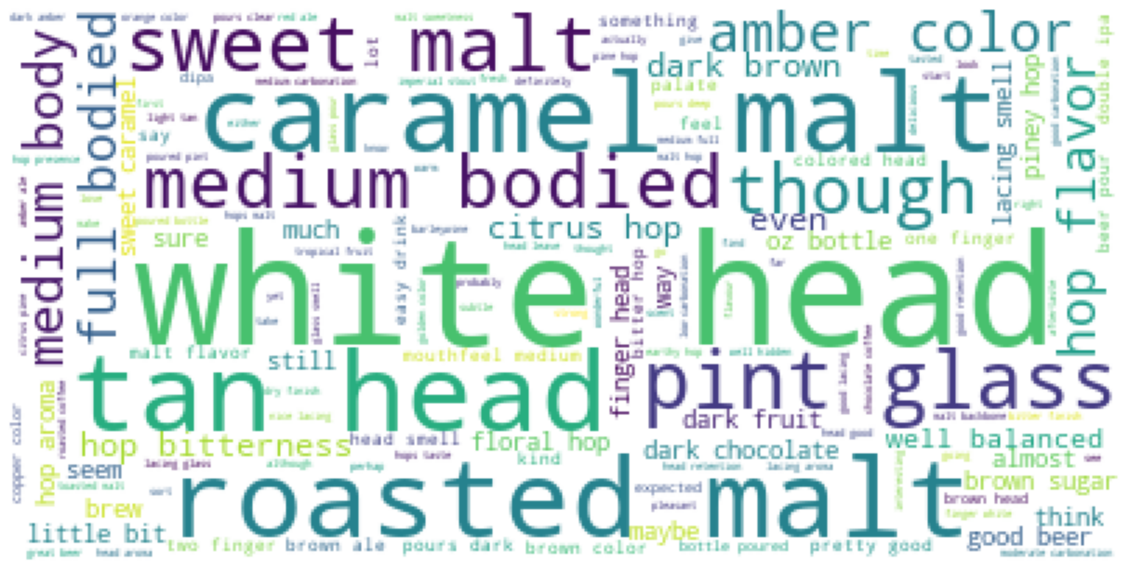

In [255]:
wc = WordCloud(background_color="white",stopwords=STOPWORDS)

wc.generate(wordstring)
print ("Word Cloud for input text:")
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [256]:
d_0 = df.loc[:,['beer_style','review_text','review_overall']]
d_0

,beer_style,review_text,review_overall
338785,Dubbel,A - Pours out a reddish/brown color with a thr...,5.0
123522,American Double / Imperial Stout,"This was a really good beer, but not a really ...",5.0
411322,American Amber / Red Ale,"Bomber poured into a pint glass, bottle date i...",5.0
247862,Belgian Strong Dark Ale,330mL bottle. Pours deep mahogany that shows f...,5.0
180183,American Double / Imperial Stout,"Black, or the darkest possible brown, body, na...",5.0
...,...,...,...
397698,American Pale Lager,"Holy skunk, Batman! Usually the first thing I ...",1.0
362527,American Adjunct Lager,"Bought for me, I chose it as it was new to me ...",1.0
39638,American Pale Ale (APA),This American pale ale has a spicy grassy hop ...,0.0
39617,Irish Dry Stout,This beer presents with a heavy smoky roast ar...,0.0


In [257]:
d_0 = d_0.groupby(['beer_style','review_text'])[['review_overall']].sum().sort_values('review_overall',ascending = False).reset_index()
d_0

,beer_style,review_text,review_overall
0,American IPA,#NAME?,51.5
1,Tripel,#NAME?,50.5
2,American Pale Ale (APA),#NAME?,45.0
3,Russian Imperial Stout,#NAME?,38.5
4,Belgian Strong Pale Ale,#NAME?,35.5
...,...,...,...
504756,American Adjunct Lager,We got a ton of this one winter for 3 bucks a ...,1.0
504757,Fruit / Vegetable Beer,Had this at the BEERTOPIA. Looked like pale ap...,1.0
504758,Czech Pilsener,This is one of the most commercial tasting mic...,0.0
504759,American Pale Ale (APA),This American pale ale has a spicy grassy hop ...,0.0


In [258]:
d_0.loc[d_0.review_text != '#NAME?'].head(5)

,beer_style,review_text,review_overall
16,American Adjunct Lager,"Pours a light yellow color, nice carbonation, ...",16.5
23,Märzen / Oktoberfest,It poured a copper color with a nice white hea...,11.5
28,Fruit / Vegetable Beer,"Another great selection from Rogue, this one h...",10.0
29,American Double / Imperial Stout,750ml bottle purchased at the Bruery release o...,10.0
30,Tripel,The clear light golden / dark straw hued brew ...,9.5


#### THe most favorite 'beer_style ' based on reviews written by users are:
.American Adjunct Lager
.Märzen / Oktoberfes
.American Adjunct Lager
.English Porter
.Fruit / Vegetable Beer

# Q6:How does written review compare to overall review score for the beer styles?

In [260]:
df.columns

Index(['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style',
       'review_appearance', 'review_palette', 'review_overall', 'review_taste',
       'review_profileName', 'review_aroma', 'review_text', 'review_time',
       'year'],
      dtype='object')

In [ ]:
# consider only revalent columns

In [262]:
TextData = df[['beer_beerId','beer_name','beer_ABV','beer_style','review_overall','review_text']]

In [263]:
TextData = reviewTextData.loc[reviewTextData['review_overall'] >= 4] = reviewTextData.loc[reviewTextData['review_overall'] >= 4]

In [ ]:
#Initial text processing to deconstruct the short forms


In [265]:
import re
def contract(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    
    return phrase

In [266]:
clean_reviews = []

for sentance in (TextData['review_text'].values):
    sentance = contract(sentance) 
    sentance = re.sub("\S*\d\S*", "", sentance).strip() 
    clean_reviews.append(sentance)

In [267]:
TextData['clean_review_text'] = preprocessed_reviews

In [268]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mddan\AppData\Roaming\nltk_data...


In [272]:
from tqdm import tqdm
tqdm.pandas()

In [269]:
sianalyzer = SentimentIntensityAnalyzer()

In [273]:
TextData['polarity_score2'] = TextData['clean_review_text'].progress_apply(lambda x: sianalyzer.polarity_scores(x)['compound'])

100%|█████████████████████████████████████████████████████████████████████████| 325602/325602 [11:55<00:00, 455.29it/s]


In [274]:
TextDatagroupped = TextData.groupby('beer_style')['polarity_score2'].mean()

In [275]:
TextDatagroupped.sort_values(ascending=False)[0:5]

beer_style
Braggot                      0.924796
Happoshu                     0.921055
Dortmunder / Export Lager    0.907733
Wheatwine                    0.896663
Quadrupel (Quad)             0.892258
Name: polarity_score2, dtype: float64

In [276]:
# Obsering the top 'polarity_score2' and 'beer_beerId' associated with it.
TextData.loc[TextData['beer_style'] == 'Braggot']

,beer_beerId,beer_name,beer_ABV,beer_style,review_overall,review_text,preprocessed_review_text,polarity_score2
468763,69407,Sixteen,10.50,Braggot,5.0,"Weyerbacher Sixteen on tap at The Pony Bar, HK...","Weyerbacher Sixteen on tap at The Pony Bar, HK...",0.9974
468782,69407,Sixteen,10.50,Braggot,5.0,Now this is an awesome beer/mead combo!! A-Dee...,Now this is an awesome beer/mead combo!! A-Dee...,0.9821
9061,5972,Luna De Miel: Raspberry Meade,7.82,Braggot,5.0,750 ml crowned bottle. I bought this with no i...,ml crowned bottle. I bought this with no idea ...,0.9115
259822,55238,Apico,16.30,Braggot,4.5,Kept seeing this in various beer stores but di...,Kept seeing this in various beer stores but di...,0.9770
468727,69407,Sixteen,10.50,Braggot,4.5,12 oz. bottle into a Samuel Smith 12 oz. nonic...,oz. bottle into a Samuel Smith oz. nonic. App...,0.9847
...,...,...,...,...,...,...,...,...
468846,69407,Sixteen,10.50,Braggot,4.0,Taken from my notes made over the past weekend...,Taken from my notes made over the past weekend...,0.9871
468847,69407,Sixteen,10.50,Braggot,4.0,dark amber color that was somewhat hazy and cl...,dark amber color that was somewhat hazy and cl...,0.9538
468851,69407,Sixteen,10.50,Braggot,4.0,This Braggot pours into a tulip glass a deep b...,This Braggot pours into a tulip glass a deep b...,0.8140
468849,69407,Sixteen,10.50,Braggot,4.0,"12 ounce bottle, bottled on 04/14/2011. Served...","ounce bottle, bottled on Served in a snifter,...",0.8338


# By Observing the mean compund ploarity score , we can say that the beer style "Braggot" is quite most famous.

# By Observing the mean compund ploarity score calculated we can get an idea how the user written review text is collaborating in calculating the overall review score.

# 7. How do find similar beer drinkers by using written reviews only?